In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [5]:
valid_df = pd.read_csv("/hkfs/work/workspace/scratch/bh6321-energy_challenge/data/valid.csv")

### Analyzing the trends of load
The power consumption of multiple cities has been analyzed to discover features that can be reliably used by the network. We hope these physical characteristics can bring additional information, which is hard to grasp by only checking time series. There are load characteristics that are well-known in the field of energy systems modeling. For instance, we know that power consumption patterns on weekdays are different from weekends. The following figure shows the power consumption for one of the cities. The blue lines depict the load pattern on weekends. 

City:  bs


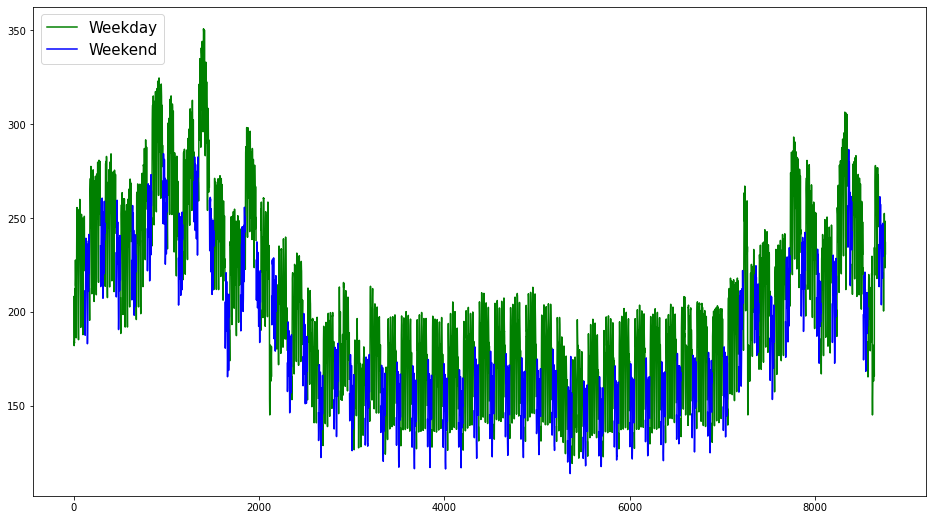

In [6]:
## Showing the impact of weekday vs weekend
place = 0*8760
print('City: ', valid_df["City"][place])
time_stamp = valid_df["Time [s]"][place:place+8760]
load = valid_df["Load [MWh]"][place:place+8760]
WD = load + 0
WE = load + 0
counter = place-1
for i in time_stamp:
    counter = counter + 1
    if (pd.Timestamp(i).day_name() =='Saturday') or (pd.Timestamp(i).day_name() =='Sunday'):
        WD[counter] = 0
        WE[counter] = load[counter]
    else:
        WD[counter] = load[counter]
        WE[counter] = 0
        
WD.replace(0, np.nan, inplace=True)
WE.replace(0, np.nan, inplace=True)

WD.plot(figsize=(16,9),color='g');
WE.plot(figsize=(16,9),color='b');
plt.legend(["Weekday", "Weekend"], loc='upper left',prop={'size': 15});

### Seasonality
Due to huge attempts in the past for rapid electrification, we can see many sectors including transport and industries are becoming increasingly dependent on electricity. To make the matter worse, large-scale electricity storage is not economically viable yet. Therefore, we should be able to see seasonality in the consumption pattern. The following figure shows the consumption pattern of a city over a year. The electric heat pumps can be responsible for this pattern.  

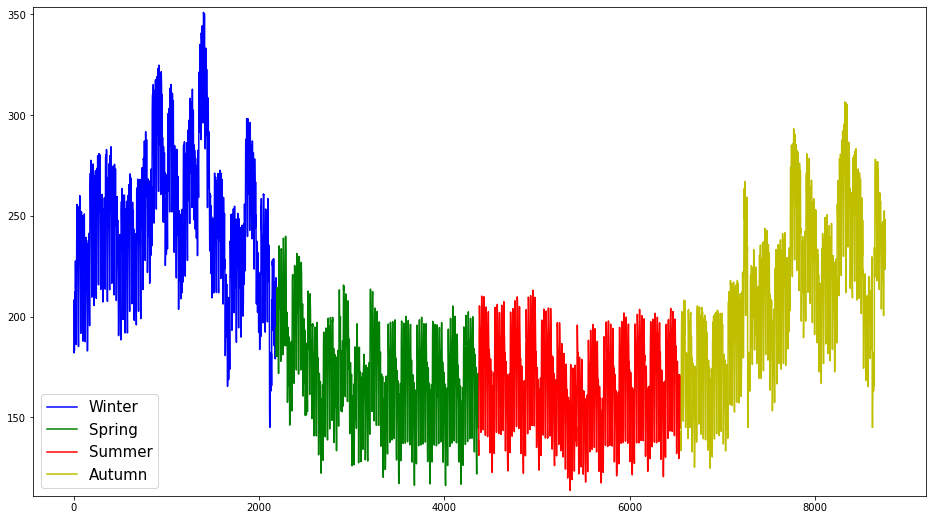

In [8]:
def calculate_range(df):
    m = statistics.mean(df)
    s = statistics.stdev(df)
    return m-2*s,m+3.5*s 

place = 0*8760
loads = valid_df["Load [MWh]"][place:place+8760]
r1,r2 = calculate_range(loads)

Winter = loads[0:91*24]
Spring = loads[91*24:2*91*24]
Summer = loads[2*91*24:3*91*24]
Autumn = loads[3*91*24:]

Winter.plot(figsize=(16,9),color='b',ylim=(r1,r2));
Spring.plot(figsize=(16,9),color='g',ylim=(r1,r2));
Summer.plot(figsize=(16,9),color='r',ylim=(r1,r2));
Autumn.plot(figsize=(16,9),color='y',ylim=(r1,r2));

plt.legend(["Winter", "Spring","Summer","Autumn"], loc='lower left',prop={'size': 15});

### Outliers
In order to help the model to generalize over data, we removed the outliers. The outliers are detected on a weekly bases. If the power consumption is beyond 99.7% of the sample distribution (i.e., $|x-\mu| \geq 3 \sigma$), it is counted as outlier. The outliers will be taken out by replacing them with a high or low value in the acceptable range.

City:  ol


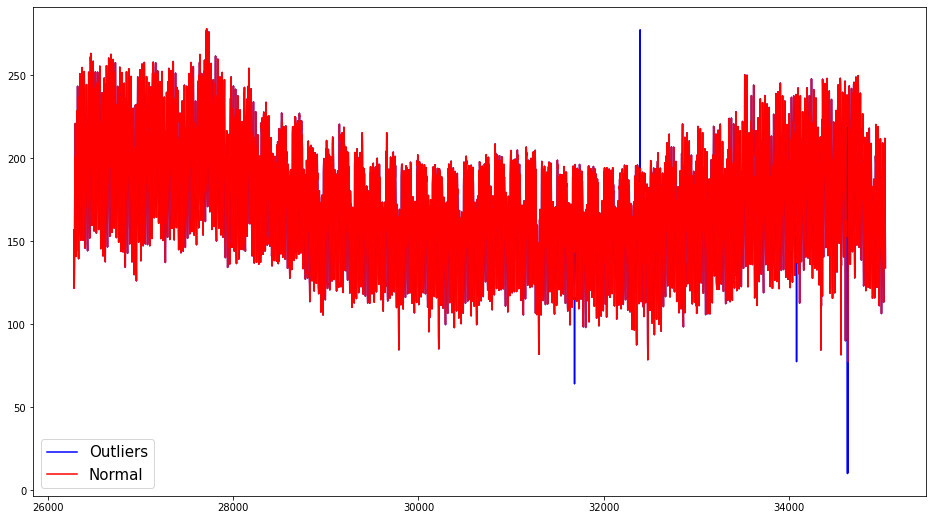

In [34]:
#Cleaning Outliers

def remove_outliers(df):        
    new_df = df + 0
    window = 7*24
    for k in range(0,len(df)-window,window):
        m = statistics.mean(df[k:k+window])
        s = statistics.stdev(df[k:k+window])
        for j in range(k,k+window,1):
            if (np.abs(df[df.index.start+j]-m) > 3*s):
                new_df[df.index.start+j]=-1;
       
    new_df.replace(-1, np.nan, inplace=True)
    return new_df

place = 3*8760

print('City: ', valid_df["City"][place])
loads = valid_df["Load [MWh]"][place:place+8760]
loads2 = remove_outliers(loads)

loads.plot(figsize=(16,9),color='b');
loads2.plot(figsize=(16,9),color='r');
plt.legend(["Outliers", "Normal"], loc='lower left',prop={'size': 15});